In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np

In [2]:
df = pd.read_csv('framingham.csv')
df.head()

,Male,Age,Education,CurrentSmoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose,TenYearCHD
0,1,39,College,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,High school/GED,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,Some high school,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,Some college/vocational school,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,Some college/vocational school,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [3]:
df = pd.get_dummies(df, drop_first=True, columns=["Education"])
df.head()

,Male,Age,CurrentSmoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose,TenYearCHD,Education_High school/GED,Education_Some college/vocational school,Education_Some high school
0,1,39,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0,0,0,0
1,0,46,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0,1,0,0
2,1,48,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0,0,0,1
3,0,61,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1,0,1,0
4,0,46,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0,0,1,0


In [4]:
features=['Male',
 'Age',
 'CurrentSmoker',
 'CigsPerDay',
 'BPMeds',
 'PrevalentStroke',
 'PrevalentHyp',
 'Diabetes',
 'TotChol',
 'SysBP',
 'DiaBP',
 'BMI',
 'HeartRate',
 'Glucose',
 'Education_High school/GED',
 'Education_Some college/vocational school',
 'Education_Some high school']

X = df[features]
y = df['TenYearCHD']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=144)

In [6]:
clf = LogisticRegression(penalty='none',max_iter=1500)
clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred)

0.7222676022820096

In [7]:
clf1 = LogisticRegressionCV(penalty='l1',Cs=[1,10,100],cv=5,solver='liblinear')
clf1.fit(X_train,y_train)
y_pred = clf1.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred)

0.7237469207664156

In [8]:
clf2 = LogisticRegressionCV(penalty='l2',Cs=[1,10,100],cv=5,solver='liblinear')
clf2.fit(X_train,y_train)

y_pred = clf2.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred)

0.7201193745698722

In [9]:
clfT = DecisionTreeClassifier(max_depth=3)
clfT.fit(X_train,y_train)

y_pred = clfT.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred)

0.6655357384050373

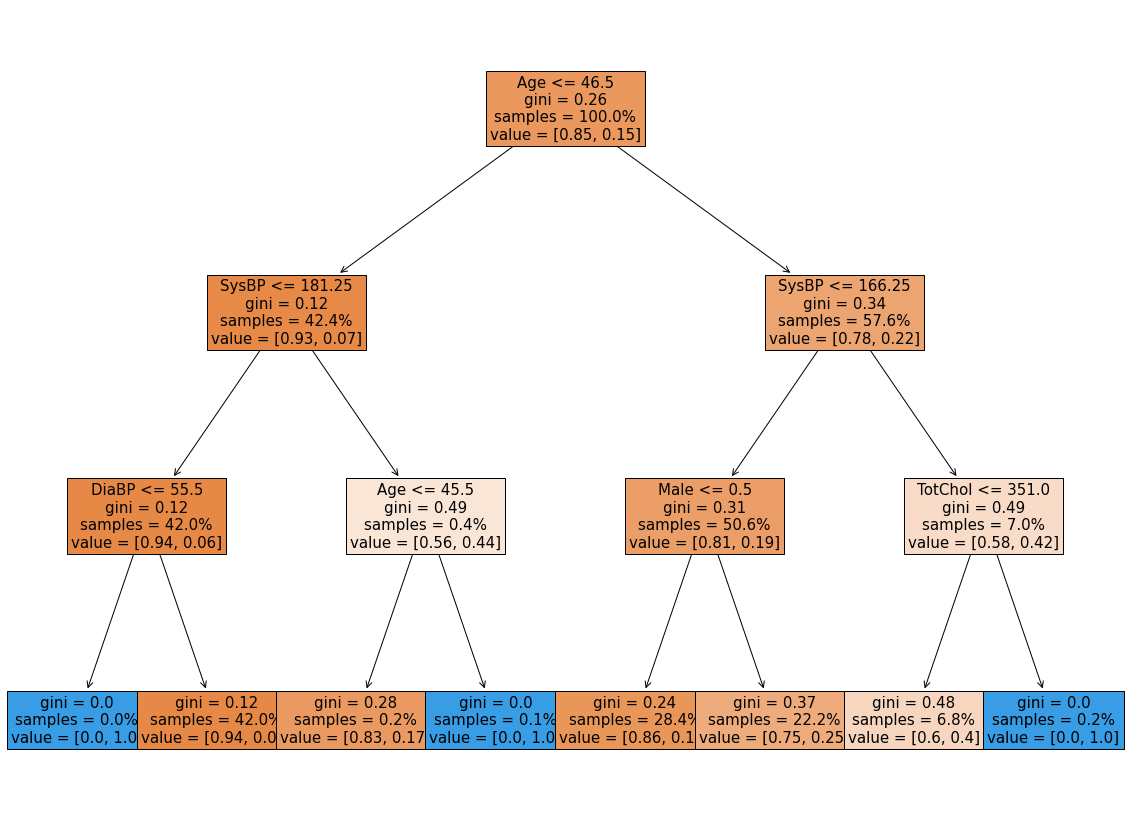

In [10]:
features=['Male',
 'Age',
 'CurrentSmoker',
 'CigsPerDay',
 'BPMeds',
 'PrevalentStroke',
 'PrevalentHyp',
 'Diabetes',
 'TotChol',
 'SysBP',
 'DiaBP',
 'BMI',
 'HeartRate',
 'Glucose',
 'Education_High school/GED',
 'Education_Some college/vocational school',
 'Education_Some high school']

plt.rcParams["figure.figsize"] = (20,15)
plot_tree(clfT, feature_names=features, filled=True, fontsize=15, proportion=True, precision=2)
plt.show()

In [11]:
y_pred = clfT.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred)

0.6655357384050373

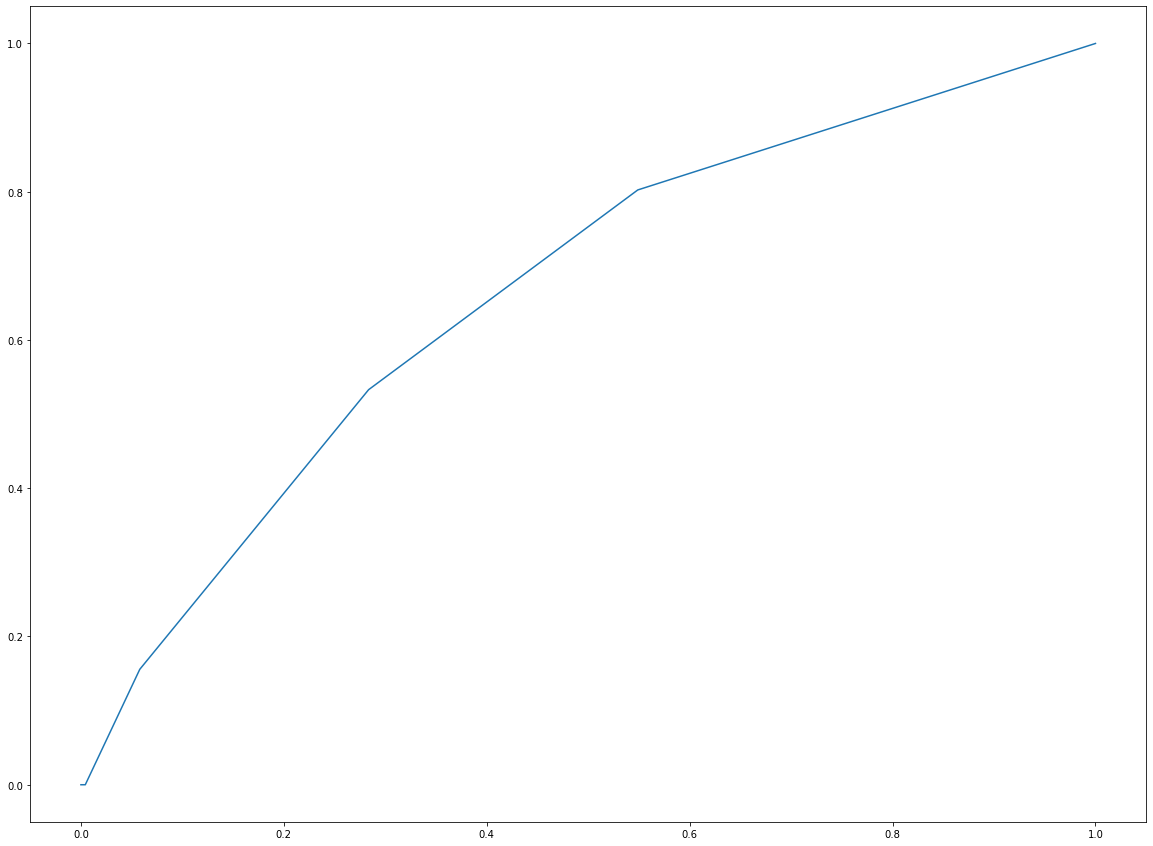

In [12]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)

In [ ]:
#TPR = 0.6